In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import anndata as ad

In [2]:
with open("GSE72056_melanoma_single_cell_revised_v2.txt" , "r") as file:
    data = file.read().split()
    data = data[:4646] + data[18587:]
    columns = [data[i : i + 4646] for i in range(0 , len(data) , 4646)]
    df = pd.DataFrame({col[0]:col[1:] for col in columns[1:]})
df

,C9orf152,RPS11,ELMO2,CREB3L1,PNMA1,MMP2,TMEM216,TRAF3IP2-AS1,LRRC37A5P,LOC653712,...,GPLD1,SNORD115-39,RAB8A,RXFP2,PCIF1,PIK3IP1,SNRPD2,SLC39A6,CTSC,AQP7
0,0,9.2172,0,0,0,0,0,2.8514,0,0,...,0.62667,0,0,0,0,7.6069,0,0,2.6638,0
1,0,8.3745,0,0,0,0,0,2.0983,0,0,...,1.0545,0,0,0,0,0,0,0,6.9901,0
2,0,9.313,2.1263,0,0,0.73812,0,0.6173,0,0,...,0.99639,0,2.7634,0,3.6782,0,3.9871,3.8777,1.6126,0
3,0,7.8876,0,0,0,0,0,0.96495,0,0,...,0.23143,0,4.1937,0,0,0,5.2639,3.766,4.8417,0
4,0,8.3291,0,0,0,0,3.7949,1.4735,0,0,...,0,0,2.5705,0,0,0,6.0824,1.7816,4.4607,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640,0,5.4889,0,0,0,0,0,2.4052,0,0,...,1.2962,0,0,0,0,0,6.0986,0,3.6464,0
4641,0,4.9262,5.5296,0,0,0,0,1.6988,0,0,...,0.99245,0,0,0,5.5465,3.7384,0,0,7.0004,0
4642,0,7.0958,0,0,0,0,0,1.5589,0,0,...,0.97516,0,0,0,0,0,0,0,1.9615,0
4643,0,3.997,0,0,0,0,0,0.47125,0,0,...,0.49208,0,0,0,0,0,0,0,7.1918,0


In [3]:
df = df.astype(float)
df.sum(axis = 1)

0        7143.362525
1        8913.484016
2       12578.256217
3       16760.854266
4       16326.734878
            ...     
4640    11473.632070
4641    10071.714407
4642    10088.412119
4643     9881.231195
4644    12259.835588
Length: 4645, dtype: float64

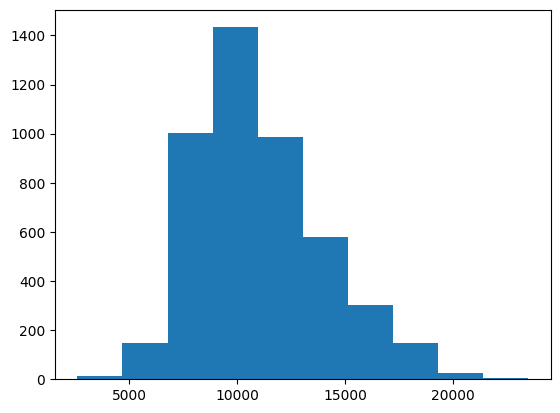

In [4]:
import matplotlib.pyplot as plt
plt.hist(df.sum(axis=1))
plt.show()

In [5]:
df.index = columns[0][1:]
df
adata = ad.AnnData(X = df.values,
                        var = pd.DataFrame(index = df.columns),
                        obs = pd.DataFrame(index = columns[0][1:]))
adata

AnnData object with n_obs × n_vars = 4645 × 23684

In [14]:
adata.write_h5ad("GSE72056_processed.h5ad")
adata

AnnData object with n_obs × n_vars = 4645 × 22287
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

In [6]:
sc.settings.verbosity = 3             
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/V

scanpy==1.9.5 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.11.2 pandas==2.1.0 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.10.8 pynndescent==0.5.10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


normalizing counts per cell
    finished (0:00:00)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

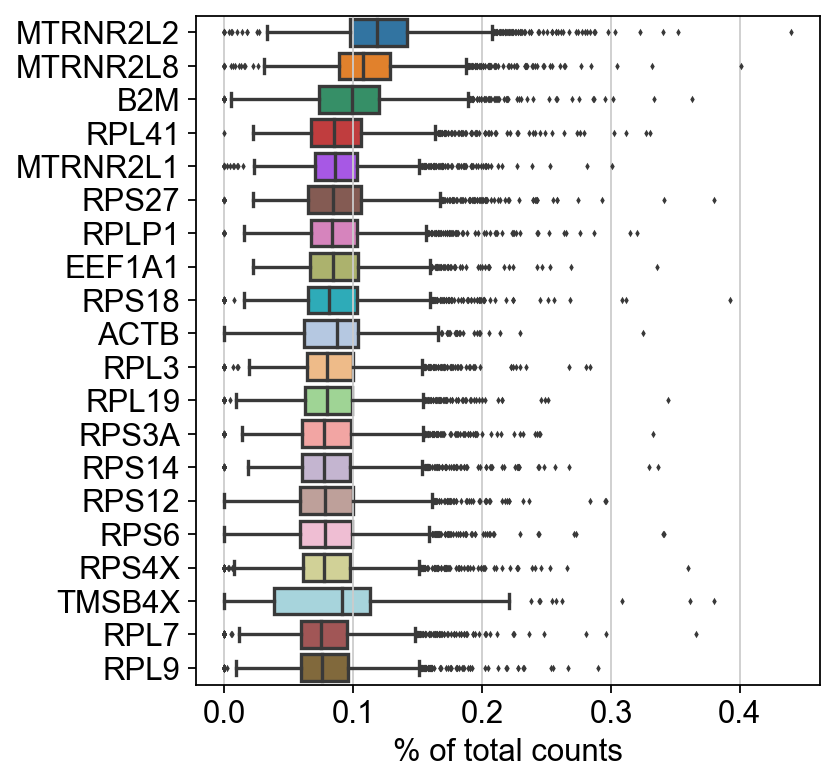

In [7]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [8]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


filtered out 1397 genes that are detected in less than 3 cells


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [9]:
adata

AnnData object with n_obs × n_vars = 4645 × 22287
    obs: 'n_genes'
    var: 'n_cells'

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

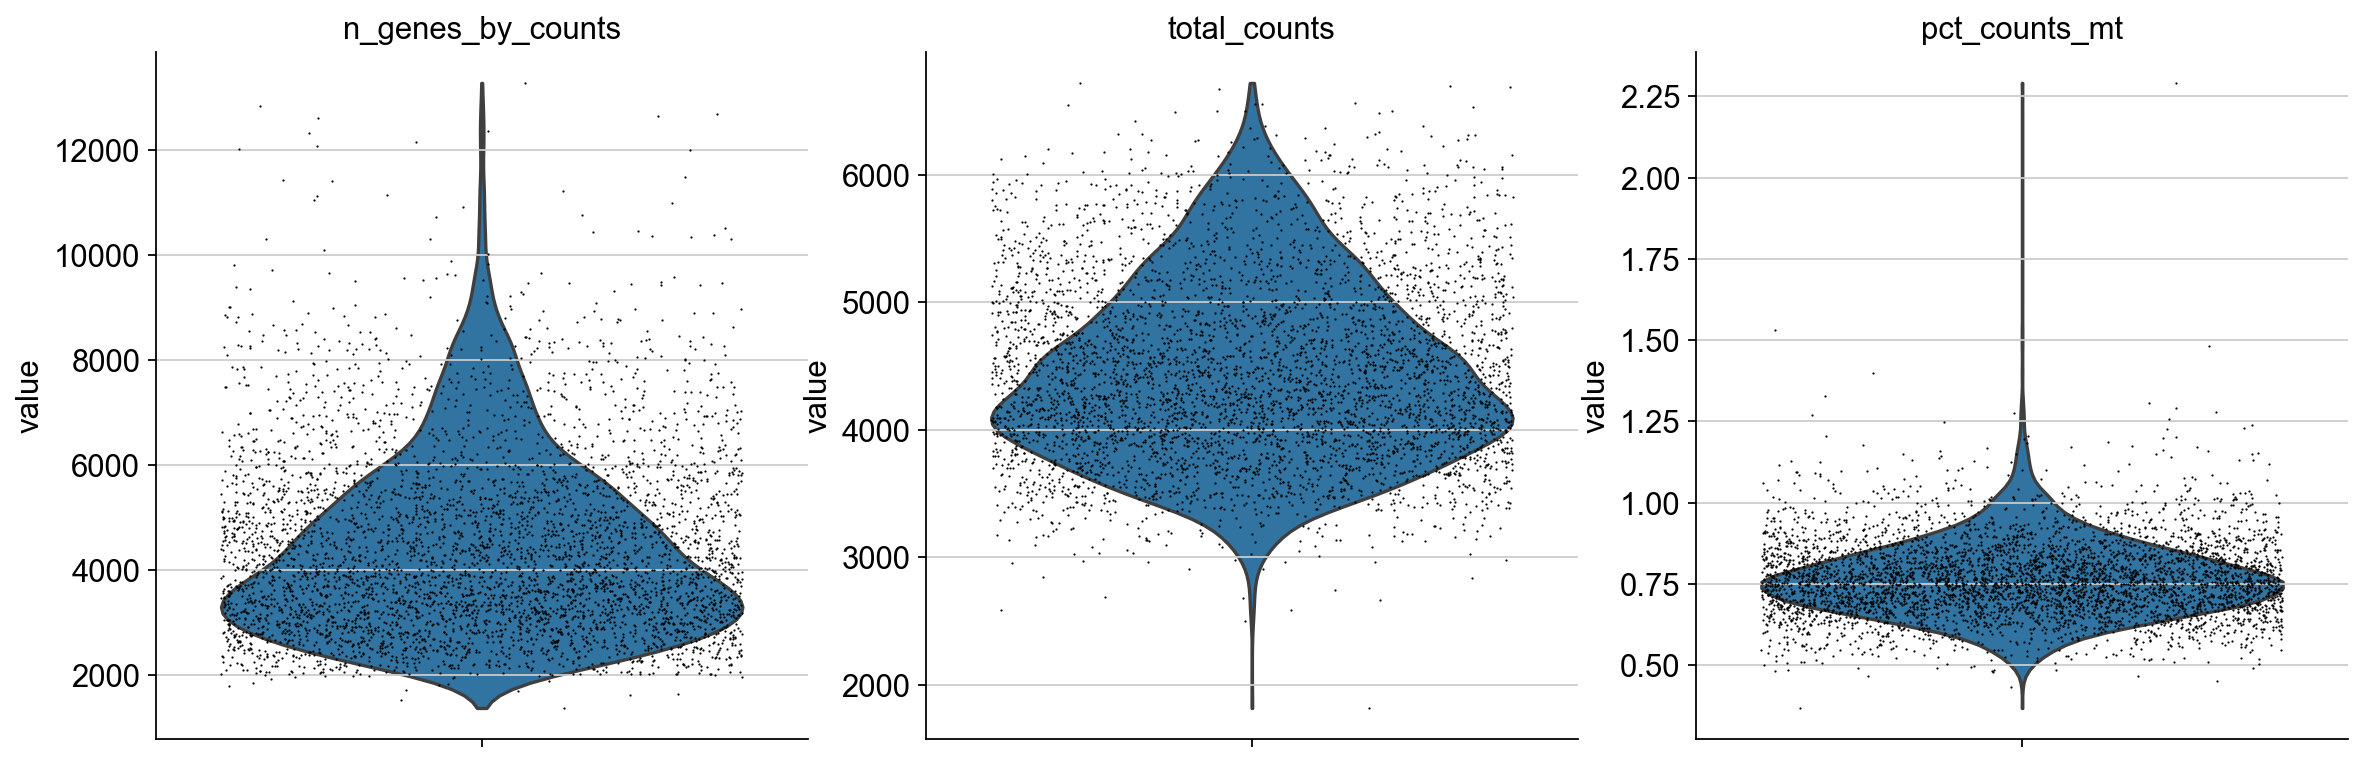

In [19]:
adata.var['mt'] = adata.var_names.str.startswith('MT') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

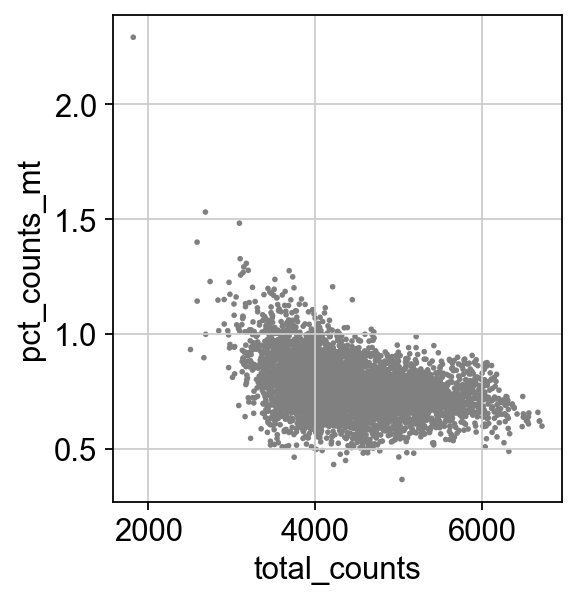

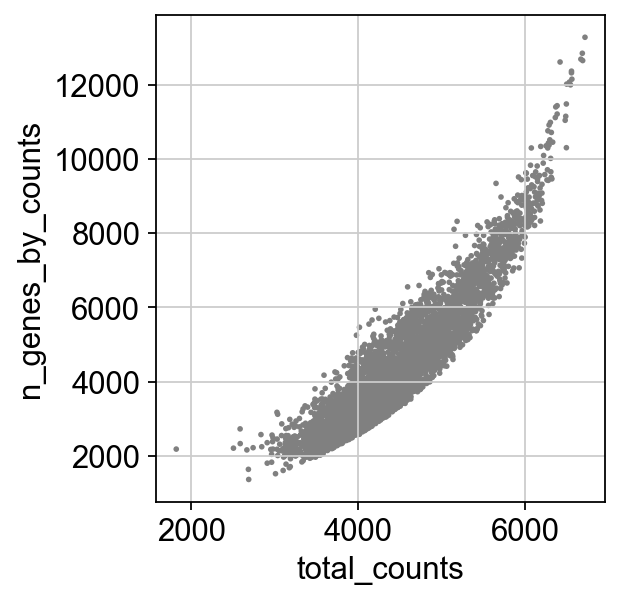

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden
Cy72_CD45_H02_S758_comb,3365,3365,3734.092954,27.029537,0.723858,1
CY58_1_CD45_B02_S974_comb,3636,3636,3937.746054,29.258582,0.743029,2
Cy71_CD45_D08_S524_comb,4660,4660,4785.676641,26.874918,0.561570,21
Cy81_FNA_CD45_B01_S301_comb,6386,6386,5450.804458,40.224102,0.737948,13
Cy80_II_CD45_B07_S883_comb,5913,5913,5407.646383,40.502009,0.748977,16
...,...,...,...,...,...,...
CY75_1_CD45_CD8_7__S223_comb,5384,5384,4683.658661,29.458028,0.628953,5
CY75_1_CD45_CD8_1__S65_comb,4769,4769,4307.228187,34.438742,0.799557,5
CY75_1_CD45_CD8_1__S93_comb,4726,4726,4302.782311,31.053174,0.721700,5
CY75_1_CD45_CD8_1__S76_comb,4975,4975,4225.789260,35.645653,0.843527,8


In [28]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')  # cell with mt has less total gene counts
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
adata.obs

In [12]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


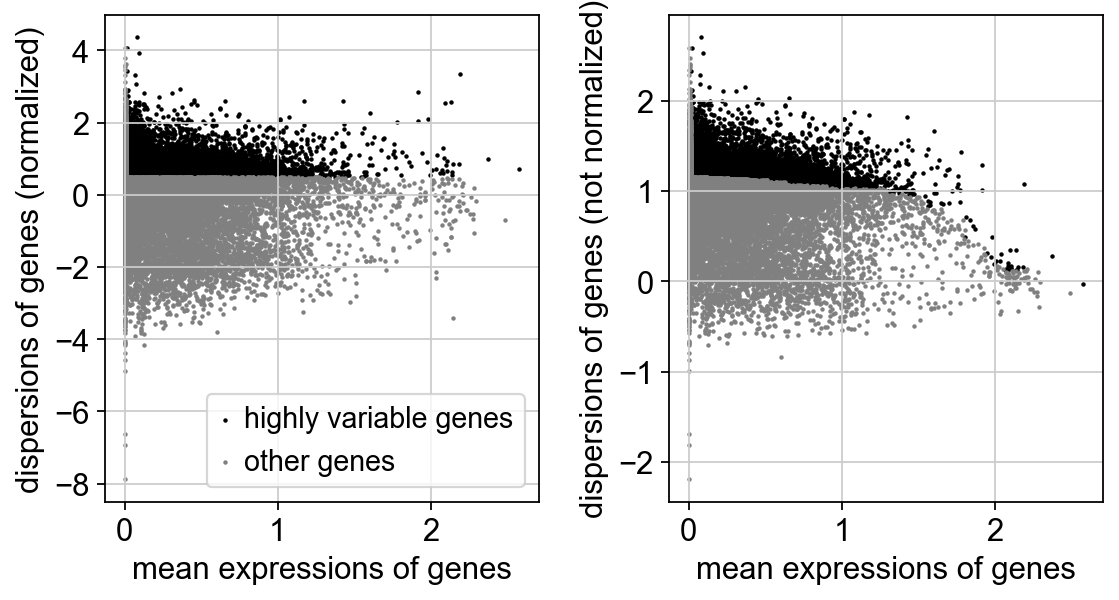

In [13]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

computing PCA
    on highly variable genes
    with n_comps=50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


    finished (0:00:33)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


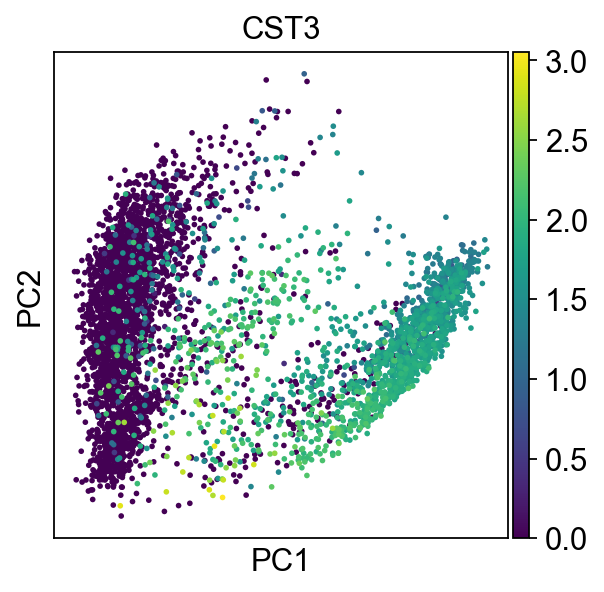

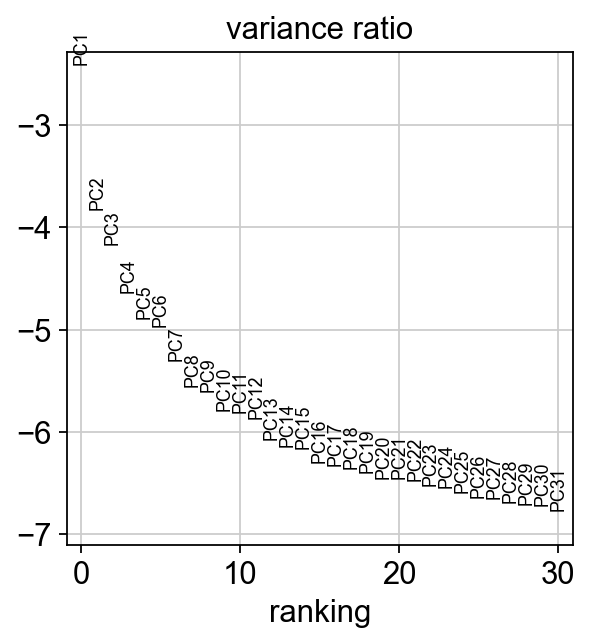

In [17]:
sc.tl.pca(adata, svd_solver='arpack')
adata
sc.pl.pca(adata, color='CST3')
sc.pl.pca_variance_ratio(adata, log=True)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


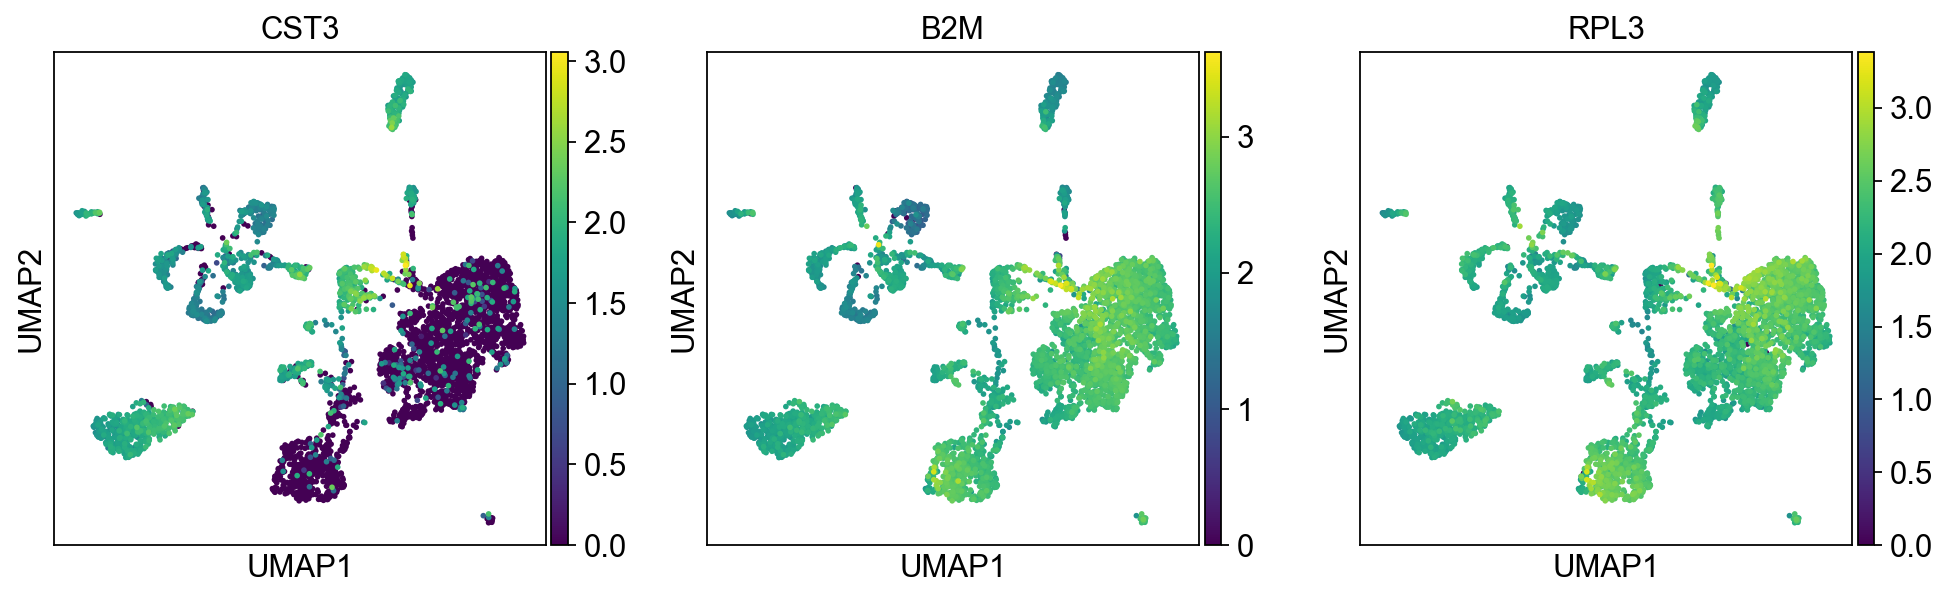

In [20]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['CST3', 'B2M', 'RPL3'])

In [29]:
import re
cell_types = pd.Series([re.split('[-_]' , x)[0] for x in df.index.to_list()])
cell_types.value_counts()

cy79           896
cy80           382
CY89A          269
CY75           254
cy60           226
cy94           224
cy53           143
Cy81           133
cy78           131
CY88           124
cy84           110
cy72            91
Cy72            90
Cy71            89
Cy67            88
CY94CD45POS     88
cy88            86
CY88CD45POS     85
cy82            84
cy58            80
cy74            78
cy81            72
Cy59            70
Cy74            69
CY89COREQ1      65
CY65            63
CY58            62
CY88CD45        56
CY94            52
monika          52
Cy80            49
CY80            49
CY84            49
CY89NEG         43
CY89CORE11      38
SS2             38
CY89FNA         32
CY89FNAQ2       28
CY67             7
Name: count, dtype: int64

In [33]:
adata.obs['cell_type'] = cell_types.values
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,cell_type
Cy72_CD45_H02_S758_comb,3365,3365,3734.092954,27.029537,0.723858,1,Cy72
CY58_1_CD45_B02_S974_comb,3636,3636,3937.746054,29.258582,0.743029,2,CY58
Cy71_CD45_D08_S524_comb,4660,4660,4785.676641,26.874918,0.561570,21,Cy71
Cy81_FNA_CD45_B01_S301_comb,6386,6386,5450.804458,40.224102,0.737948,13,Cy81
Cy80_II_CD45_B07_S883_comb,5913,5913,5407.646383,40.502009,0.748977,16,Cy80
...,...,...,...,...,...,...,...
CY75_1_CD45_CD8_7__S223_comb,5384,5384,4683.658661,29.458028,0.628953,5,CY75
CY75_1_CD45_CD8_1__S65_comb,4769,4769,4307.228187,34.438742,0.799557,5,CY75
CY75_1_CD45_CD8_1__S93_comb,4726,4726,4302.782311,31.053174,0.721700,5,CY75
CY75_1_CD45_CD8_1__S76_comb,4975,4975,4225.789260,35.645653,0.843527,8,CY75


running Leiden clustering
    finished: found 26 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Library/Frameworks/Python.framework/Versions/3.1

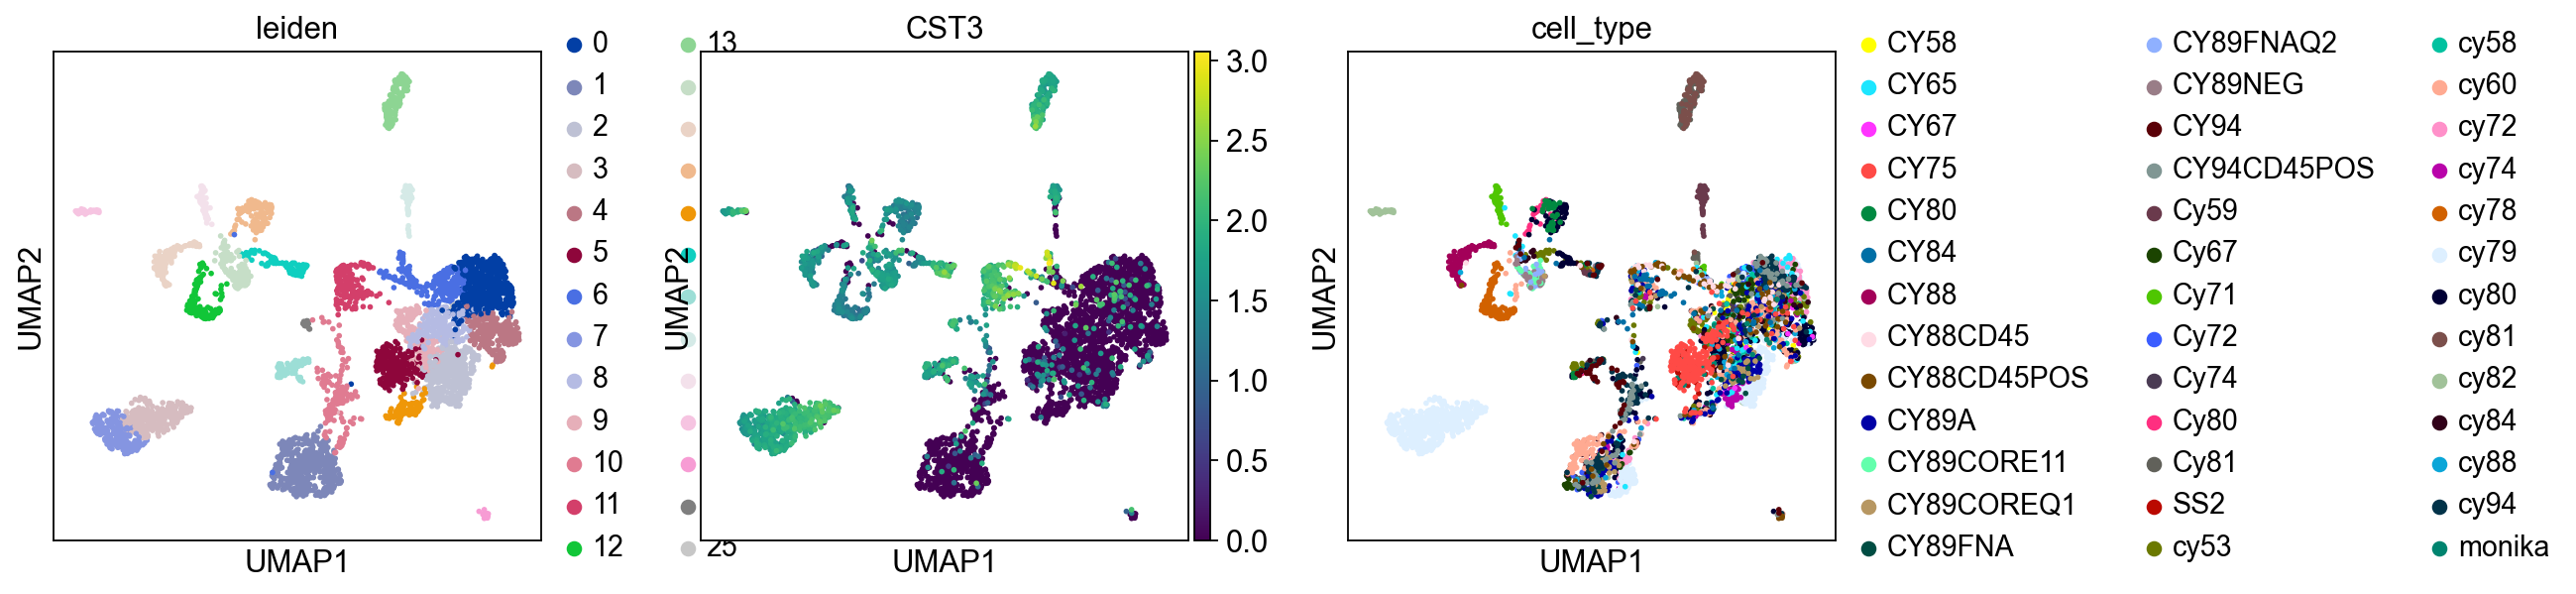

In [34]:
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden','CST3', 'cell_type'])

In [35]:
import sklearn
sklearn.metrics.normalized_mutual_info_score(cell_types.values, adata.obs['leiden'])

0.454320782273214

In [37]:
# BanditPAM with L1
from banditpam import KMedoids
import time
start_time = time.time()
kmed = KMedoids(n_medoids=5, algorithm="BanditPAM")
kmed.fit(adata.X.toarray(), 'L1')
adata.obs['kmed_l1'] = kmed.labels
adata.obs['kmed_l1'] = adata.obs['kmed_l1'].astype('category')
print('kmed_l1 completed, time=%0.1fs' % (time.time() - start_time))

# BanditPAM with L2
from banditpam import KMedoids
start_time = time.time()
kmed = KMedoids(n_medoids=5, algorithm="BanditPAM")
kmed.fit(adata.X.toarray(), 'L2')
adata.obs['kmed_l2'] = kmed.labels
adata.obs['kmed_l2'] = adata.obs['kmed_l2'].astype('category')
print('kmed_l2 completed, time=%0.1fs' % (time.time() - start_time))

ImportError: dlopen(/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/banditpam.cpython-311-darwin.so, 0x0002): symbol not found in flat namespace '_wrapper2_sgemv_'